# **Prediction of Computer Science department’s educational performance through data mining techniques by analyzing students’ academic statements**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
#Importing Dataset
from google.colab import files
files.upload()

Saving Department Analysis.csv to Department Analysis (4).csv


{'Department Analysis.csv': b'\xef\xbb\xbfID,CSE-111,CSE-112,MAT-111,PHY-111,PHY-112,CEL-111,CSE-121,CSE-122,MAT-121,PHY-121,PHY-122,CEL-121,CSE-131,CSE-132,CSE-133,CSE-134,MAT-131,BDS-127,CSE-211,CSE-212,CSE-213,CSE-214,CSE-215,MAT-211,CSE-221,CSE-222,CSE-223,CSE-224,MAT-221,STA-221,CSE-231,CSE-233,CSE-234,CSE-235,CSE-236,IEC-231,CSE-311,CSE-312,CSE-313,CSE-314,CSE-315,BNA-311,CSE-321,CSE-322,CSE-323,CSE-324,CSE-325,CSE-327,CSE-331,CSE-332,CSE-333,CSE-334,CSE-335,CSE-336,CSE-337,CSE-338,CSE-411,CSE-412,CSE-413,CSE-415,CSE-416,CSE-417,CSE-483,CSE-489,CSE-491,CSE-499\r\n1.71E+11,3,3.75,3.5,2.5,3.25,3.5,2.5,2.5,3.75,3,3.5,3.25,2.25,3.5,3.5,3,3,3.75,3.25,4,3,2.5,3.25,4,2.5,3.5,3.25,4,3.25,3.25,3.25,2.5,3.75,4,3,3.5,3.5,4,3.75,4,4,4,4,4,4,4,4,3.5,4,3.5,3.75,4,3.75,3.75,2.25,4,3.75,4,3.5,4,3.5,3.5,2.75,4,3.25,4\r\n1.71E+11,2.5,3.75,2.25,2.25,3.25,3.5,4,2,2.25,3,3.5,3.25,2,3.5,3.25,2.5,2.5,2.75,2.75,4,3.75,2,3.25,3.5,3.25,4,3.75,3.5,2.25,2.75,3.25,3.75,4,3.5,4,3.5,3.25,3,3.25,3.5,2.75,3.5,3.

In [ ]:
df = pd.read_csv('Department Analysis.csv')

In [ ]:
df.shape

(1004, 67)

In [ ]:
df.drop(df.index[1000:1004], inplace=True)

In [ ]:
df

,ID,CSE-111,CSE-112,MAT-111,PHY-111,PHY-112,CEL-111,CSE-121,CSE-122,MAT-121,...,CSE-411,CSE-412,CSE-413,CSE-415,CSE-416,CSE-417,CSE-483,CSE-489,CSE-491,CSE-499
0,1.710300e+11,3.0,3.75,3.50,2.50,3.25,3.50,2.50,2.5,3.75,...,3.75,4.00,3.50,4.00,3.50,3.50,2.75,4.00,3.25,4.00
1,1.710300e+11,2.5,3.75,2.25,2.25,3.25,3.50,4.00,2.0,2.25,...,3.75,3.50,4.00,3.50,2.75,4.00,3.50,3.00,3.50,4.00
2,1.710300e+11,3.0,4.00,3.50,2.25,3.25,3.50,3.50,2.0,2.50,...,4.00,3.50,3.50,3.75,3.25,3.50,3.50,3.75,3.75,3.25
3,1.710300e+11,2.5,2.50,2.75,2.75,3.25,3.75,2.00,2.0,2.75,...,3.75,3.25,3.00,3.25,2.75,3.25,3.00,3.75,3.25,3.75
4,1.710300e+11,3.5,3.75,3.25,2.75,3.50,4.00,2.50,4.0,3.75,...,4.00,4.00,3.75,3.75,3.75,4.00,4.00,3.75,3.75,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.230300e+11,3.5,3.50,3.50,3.50,3.50,3.50,3.50,3.5,3.50,...,3.50,3.50,3.50,3.50,4.00,3.50,3.50,3.50,3.50,3.50
996,1.230300e+11,3.5,3.50,2.25,3.00,3.50,3.50,3.50,4.0,4.00,...,3.50,3.25,3.50,3.50,3.50,3.50,3.50,3.50,3.25,3.50
997,1.230300e+11,3.5,2.00,2.00,3.25,3.50,3.50,2.50,2.0,2.75,...,3.25,3.50,3.50,3.25,3.25,3.50,3.50,3.50,3.25,3.50
998,1.230300e+11,2.5,2.00,4.00,3.25,3.25,3.50,2.75,2.0,2.00,...,3.25,2.50,3.50,2.75,3.50,3.50,3.00,3.50,3.25,3.00


In [ ]:
df.shape

(1000, 67)

# **Preprocessing of the Dataset**

In [ ]:
#Grouping the Dataset
IS = df[['CSE-415', 'CSE-417', 'CSE-483', 'CSE-489', 'CSE-491']]
ND = df[['CSE-111', 'CSE-327', 'CSE-333', 'CSE-334', 'CSE-413']]
TP = df[['CSE-121', 'CSE-131', 'CSE-211', 'CSE-221', 'CSE-235']]
EP = df[['CSE-122', 'CSE-132', 'CSE-222', 'CSE-212', 'CSE-236']]
LB = df[['CSE-211', 'CSE-215', 'CSE-223', 'CSE-235', 'CSE-315']]
SD = df[['CSE-231', 'CSE-313', 'CSE-325', 'CSE-335', 'CSE-417']]
ESD = df[['CSE-222', 'CSE-312', 'CSE-314', 'CSE-322', 'CSE-336']]
SH = df[['CSE-223', 'CSE-231', 'CSE-323', 'CSE-325', 'CSE-313']]
EH = df[['CSE-112', 'CSE-224', 'CSE-324', 'CSE-332', 'CSE-338']]
VG = df[['CSE-121', 'CSE-325', 'CSE-337', 'CSE-411', 'CSE-489']]
NA = df[['MAT-121', 'MAT-131', 'MAT-211', 'MAT-221', 'STA-221']]
TEE = df[['CSE-133', 'CSE-313', 'CSE-233', 'PHY-111', 'PHY-121']]
AD = df[['CSE-221', 'CSE-311', 'CSE-321', 'CSE-417', 'CSE-499']]
EEE = df[['CSE-134', 'CSE-214', 'CSE-234', 'PHY-112', 'PHY-122']]
EVI = df[['CSE-122', 'CSE-336', 'CSE-338', 'CSE-412', 'CSE-416']]

In [ ]:
#Finding the mean/avegare of areas
IS['ISAverage'] = IS.mean(axis = 1)
ND['NDAverage'] = ND.mean(axis = 1)
TP['TPAverage'] = TP.mean(axis = 1)
EP['EPAverage'] = EP.mean(axis = 1)
LB['LBAverage'] = LB.mean(axis = 1)
SD['SDAverage'] = SD.mean(axis = 1)
ESD['ESDAverage'] = ESD.mean(axis = 1)
SH['SHAverage'] = SH.mean(axis = 1)
EH['EHAverage'] = EH.mean(axis = 1)
VG['VGAverage'] = VG.mean(axis = 1)
NA['NAAverage'] = NA.mean(axis = 1)
TEE['TEEAverage'] = TEE.mean(axis = 1)
AD['ADAverage'] = AD.mean(axis = 1)
EEE['EEEAverage'] = EEE.mean(axis = 1)
EVI['EVIAverage'] = EVI.mean(axis = 1)

In [ ]:
#Condition set for different grades

#Grade Condition and Category for Intelligent system (IS)
grade_calculation = [
    (IS['ISAverage'] >= 3.75) & (IS['ISAverage'] <= 4.00),
    (IS['ISAverage'] >= 3.50) & (IS['ISAverage'] < 3.75),
    (IS['ISAverage'] >= 3.25) & (IS['ISAverage'] < 3.50),
    (IS['ISAverage'] >= 3.00) & (IS['ISAverage'] < 3.25),
    (IS['ISAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
IS['ISCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Network Design (ND)
grade_calculation = [
    (ND['NDAverage'] >= 3.75) & (ND['NDAverage'] <= 4.00),
    (ND['NDAverage'] >= 3.50) & (ND['NDAverage'] < 3.75),
    (ND['NDAverage'] >= 3.25) & (ND['NDAverage'] < 3.50),
    (ND['NDAverage'] >= 3.00) & (ND['NDAverage'] < 3.25),
    (ND['NDAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
ND['NDCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Theoretical Programming (TP)
grade_calculation = [
    (TP['TPAverage'] >= 3.75) & (TP['TPAverage'] <= 4.00),
    (TP['TPAverage'] >= 3.50) & (TP['TPAverage'] < 3.75),
    (TP['TPAverage'] >= 3.25) & (TP['TPAverage'] < 3.50),
    (TP['TPAverage'] >= 3.00) & (TP['TPAverage'] < 3.25),
    (TP['TPAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
TP['TPCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Experimental Programming (EP)
grade_calculation = [
    (EP['EPAverage'] >= 3.75) & (EP['EPAverage'] <= 4.00),
    (EP['EPAverage'] >= 3.50) & (EP['EPAverage'] < 3.75),
    (EP['EPAverage'] >= 3.25) & (EP['EPAverage'] < 3.50),
    (EP['EPAverage'] >= 3.00) & (EP['EPAverage'] < 3.25),
    (EP['EPAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
EP['EPCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Logic Building (LB)
grade_calculation = [
    (LB['LBAverage'] >= 3.75) & (LB['LBAverage'] <= 4.00),
    (LB['LBAverage'] >= 3.50) & (LB['LBAverage'] < 3.75),
    (LB['LBAverage'] >= 3.25) & (LB['LBAverage'] < 3.50),
    (LB['LBAverage'] >= 3.00) & (LB['LBAverage'] < 3.25),
    (LB['LBAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
LB['LBCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Software Design (SD)
grade_calculation = [
    (SD['SDAverage'] >= 3.75) & (SD['SDAverage'] <= 4.00),
    (SD['SDAverage'] >= 3.50) & (SD['SDAverage'] < 3.75),
    (SD['SDAverage'] >= 3.25) & (SD['SDAverage'] < 3.50),
    (SD['SDAverage'] >= 3.00) & (SD['SDAverage'] < 3.25),
    (SD['SDAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
SD['SDCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Experimental Software Design (ESD)
grade_calculation = [
    (ESD['ESDAverage'] >= 3.75) & (ESD['ESDAverage'] <= 4.00),
    (ESD['ESDAverage'] >= 3.50) & (ESD['ESDAverage'] < 3.75),
    (ESD['ESDAverage'] >= 3.25) & (ESD['ESDAverage'] < 3.50),
    (ESD['ESDAverage'] >= 3.00) & (ESD['ESDAverage'] < 3.25),
    (ESD['ESDAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
ESD['ESDCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for System and Hardware (SH)
grade_calculation = [
    (SH['SHAverage'] >= 3.75) & (SH['SHAverage'] <= 4.00),
    (SH['SHAverage'] >= 3.50) & (SH['SHAverage'] < 3.75),
    (SH['SHAverage'] >= 3.25) & (SH['SHAverage'] < 3.50),
    (SH['SHAverage'] >= 3.00) & (SH['SHAverage'] < 3.25),
    (SH['SHAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
SH['SHCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Experimental Hardware (EH)
grade_calculation = [
    (EH['EHAverage'] >= 3.75) & (EH['EHAverage'] <= 4.00),
    (EH['EHAverage'] >= 3.50) & (EH['EHAverage'] < 3.75),
    (EH['EHAverage'] >= 3.25) & (EH['EHAverage'] < 3.50),
    (EH['EHAverage'] >= 3.00) & (EH['EHAverage'] < 3.25),
    (EH['EHAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
EH['EHCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Vision and Graphics (VG)
grade_calculation = [
    (VG['VGAverage'] >= 3.75) & (VG['VGAverage'] <= 4.00),
    (VG['VGAverage'] >= 3.50) & (VG['VGAverage'] < 3.75),
    (VG['VGAverage'] >= 3.25) & (VG['VGAverage'] < 3.50),
    (VG['VGAverage'] >= 3.00) & (VG['VGAverage'] < 3.25),
    (VG['VGAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
VG['VGCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Numerical Analysis (NA)
grade_calculation = [
    (NA['NAAverage'] >= 3.75) & (NA['NAAverage'] <= 4.00),
    (NA['NAAverage'] >= 3.50) & (NA['NAAverage'] < 3.75),
    (NA['NAAverage'] >= 3.25) & (NA['NAAverage'] < 3.50),
    (NA['NAAverage'] >= 3.00) & (NA['NAAverage'] < 3.25),
    (NA['NAAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
NA['NACategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Theoretical Electrical and Electronics (TEE)
grade_calculation = [
    (TEE['TEEAverage'] >= 3.75) & (TEE['TEEAverage'] <= 4.00),
    (TEE['TEEAverage'] >= 3.50) & (TEE['TEEAverage'] < 3.75),
    (TEE['TEEAverage'] >= 3.25) & (TEE['TEEAverage'] < 3.50),
    (TEE['TEEAverage'] >= 3.00) & (TEE['TEEAverage'] < 3.25),
    (TEE['TEEAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
TEE['TEECategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Application Development (AD)
grade_calculation = [
    (AD['ADAverage'] >= 3.75) & (AD['ADAverage'] <= 4.00),
    (AD['ADAverage'] >= 3.50) & (AD['ADAverage'] < 3.75),
    (AD['ADAverage'] >= 3.25) & (AD['ADAverage'] < 3.50),
    (AD['ADAverage'] >= 3.00) & (AD['ADAverage'] < 3.25),
    (AD['ADAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
AD['ADCategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Experimental Electrical and Electronics (EEE)
grade_calculation = [
    (EEE['EEEAverage'] >= 3.75) & (EEE['EEEAverage'] <= 4.00),
    (EEE['EEEAverage'] >= 3.50) & (EEE['EEEAverage'] < 3.75),
    (EEE['EEEAverage'] >= 3.25) & (EEE['EEEAverage'] < 3.50),
    (EEE['EEEAverage'] >= 3.00) & (EEE['EEEAverage'] < 3.25),
    (EEE['EEEAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
EEE['EEECategory'] = np.select(grade_calculation, category, default='0')

#Grade Condition and Category for Experimental Vision and AI (EVI)
grade_calculation = [
    (EVI['EVIAverage'] >= 3.75) & (EVI['EVIAverage'] <= 4.00),
    (EVI['EVIAverage'] >= 3.50) & (EVI['EVIAverage'] < 3.75),
    (EVI['EVIAverage'] >= 3.25) & (EVI['EVIAverage'] < 3.50),
    (EVI['EVIAverage'] >= 3.00) & (EVI['EVIAverage'] < 3.25),
    (EVI['EVIAverage'] < 3.00)
]
category = ['1', '2', '3', '4', '5']
EVI['EVICategory'] = np.select(grade_calculation, category, default='0')

In [ ]:
#Preprocessing: Label Encoding
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for column in IS:
    IS[column] = lr.fit_transform(IS[column])

for column in ND:
    ND[column] = lr.fit_transform(ND[column])
    
for column in TP:
    TP[column] = lr.fit_transform(TP[column])
for column in EP:
    EP[column] = lr.fit_transform(EP[column])
for column in LB:
    LB[column] = lr.fit_transform(LB[column])
for column in SD:
    SD[column] = lr.fit_transform(SD[column])
for column in ESD:
    ESD[column] = lr.fit_transform(ESD[column])
for column in SH:
    SH[column] = lr.fit_transform(SH[column])
for column in EH:
    EH[column] = lr.fit_transform(EH[column])
for column in VG:
    VG[column] = lr.fit_transform(VG[column])
for column in NA:
    NA[column] = lr.fit_transform(NA[column])
for column in TEE:
    TEE[column] = lr.fit_transform(TEE[column])
for column in AD:
    AD[column] = lr.fit_transform(AD[column])
for column in EEE:
    EEE[column] = lr.fit_transform(EEE[column])
for column in EVI:
    EVI[column] = lr.fit_transform(EVI[column])

# **Section/Group Wise Vsualization**

            CSE-415  CSE-417  CSE-483  CSE-489  CSE-491  ISAverage
ISCategory                                                        
0              14.1     14.1     14.1     14.1     14.1       14.1
1              21.8     21.8     21.8     21.8     21.8       21.8
2              17.1     17.1     17.1     17.1     17.1       17.1
3              20.0     20.0     20.0     20.0     20.0       20.0
4              27.0     27.0     27.0     27.0     27.0       27.0


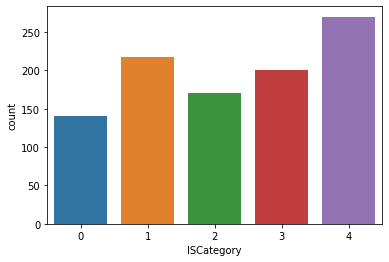

In [ ]:
#1.Intelligent system (IS)
sns.countplot(x = IS['ISCategory'])

group_value = (IS.groupby('ISCategory').count() * 100)/1000

print (group_value)

            CSE-111  CSE-327  CSE-333  CSE-334  CSE-413  NDAverage
NDCategory                                                        
0              12.3     12.3     12.3     12.3     12.3       12.3
1              20.0     20.0     20.0     20.0     20.0       20.0
2              21.2     21.2     21.2     21.2     21.2       21.2
3              21.6     21.6     21.6     21.6     21.6       21.6
4              24.9     24.9     24.9     24.9     24.9       24.9


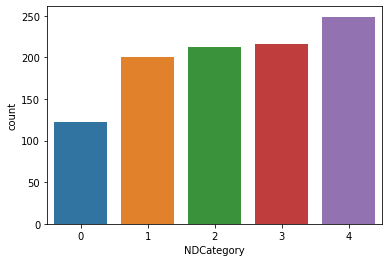

In [ ]:
#2.Network Design (ND)
sns.countplot(x = ND['NDCategory'])

group_value = (ND.groupby('NDCategory').count()* 100)/1000

print (group_value)

            CSE-121  CSE-131  CSE-211  CSE-221  CSE-235  TPAverage
TPCategory                                                        
0              10.5     10.5     10.5     10.5     10.5       10.5
1              19.9     19.9     19.9     19.9     19.9       19.9
2              25.1     25.1     25.1     25.1     25.1       25.1
3              18.1     18.1     18.1     18.1     18.1       18.1
4              26.4     26.4     26.4     26.4     26.4       26.4


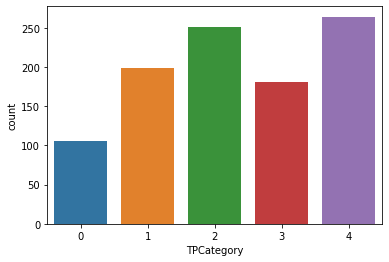

In [ ]:
#3.Theoretical Programming (TP)
sns.countplot(x = TP['TPCategory'])

group_value = (TP.groupby('TPCategory').count()* 100)/1000

print (group_value)

            CSE-122  CSE-132  CSE-222  CSE-212  CSE-236  EPAverage
EPCategory                                                        
0              14.7     14.7     14.7     14.7     14.7       14.7
1              24.1     24.1     24.1     24.1     24.1       24.1
2              21.4     21.4     21.4     21.4     21.4       21.4
3              17.8     17.8     17.8     17.8     17.8       17.8
4              22.0     22.0     22.0     22.0     22.0       22.0


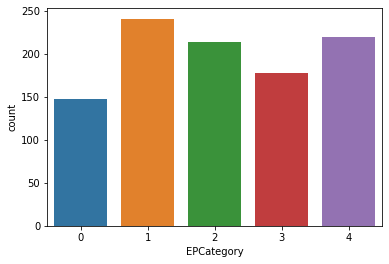

In [ ]:
#4.Experimental Programming (EP)
sns.countplot(x = EP['EPCategory'].sort_values())

group_value = (EP.groupby('EPCategory').count()* 100)/1000

print (group_value)

            CSE-211  CSE-215  CSE-223  CSE-235  CSE-315  LBAverage
LBCategory                                                        
0              11.1     11.1     11.1     11.1     11.1       11.1
1              21.2     21.2     21.2     21.2     21.2       21.2
2              23.3     23.3     23.3     23.3     23.3       23.3
3              19.1     19.1     19.1     19.1     19.1       19.1
4              25.3     25.3     25.3     25.3     25.3       25.3


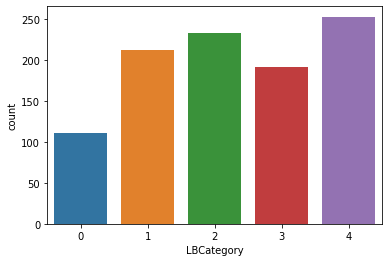

In [ ]:
#5.Logic Building (LB)
sns.countplot(x = LB['LBCategory'].sort_values())

group_value = (LB.groupby('LBCategory').count()* 100)/1000

print (group_value)

            CSE-231  CSE-313  CSE-325  CSE-335  CSE-417  SDAverage
SDCategory                                                        
0              13.6     13.6     13.6     13.6     13.6       13.6
1              21.7     21.7     21.7     21.7     21.7       21.7
2              23.5     23.5     23.5     23.5     23.5       23.5
3              20.6     20.6     20.6     20.6     20.6       20.6
4              20.6     20.6     20.6     20.6     20.6       20.6


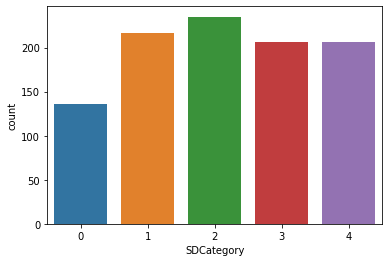

In [ ]:
#6.Software Design (SD)
sns.countplot(x = SD['SDCategory'].sort_values())

group_value = (SD.groupby('SDCategory').count()* 100)/1000

print (group_value)

             CSE-222  CSE-312  CSE-314  CSE-322  CSE-336  ESDAverage
ESDCategory                                                         
0               11.9     11.9     11.9     11.9     11.9        11.9
1               20.4     20.4     20.4     20.4     20.4        20.4
2               25.0     25.0     25.0     25.0     25.0        25.0
3               22.2     22.2     22.2     22.2     22.2        22.2
4               20.5     20.5     20.5     20.5     20.5        20.5


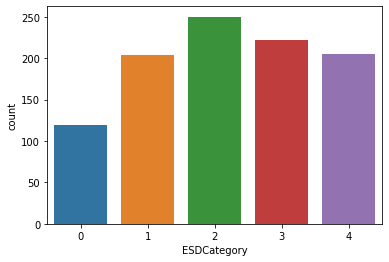

In [ ]:
#7.Experimental Software Design (ESD)
sns.countplot(x = ESD['ESDCategory'].sort_values())

group_value = (ESD.groupby('ESDCategory').count()* 100)/1000

print (group_value)

            CSE-223  CSE-231  CSE-323  CSE-325  CSE-313  SHAverage
SHCategory                                                        
0              14.5     14.5     14.5     14.5     14.5       14.5
1              22.4     22.4     22.4     22.4     22.4       22.4
2              21.8     21.8     21.8     21.8     21.8       21.8
3              18.0     18.0     18.0     18.0     18.0       18.0
4              23.3     23.3     23.3     23.3     23.3       23.3


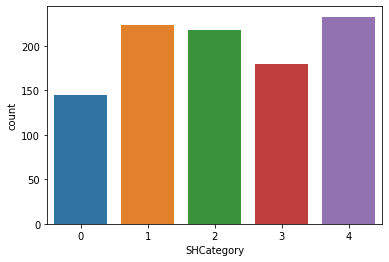

In [ ]:
#8.System and Hardware (SH)
sns.countplot(x = SH['SHCategory'].sort_values())

group_value = (SH.groupby('SHCategory').count()* 100)/1000

print (group_value)

            CSE-112  CSE-224  CSE-324  CSE-332  CSE-338  EHAverage
EHCategory                                                        
0              15.9     15.9     15.9     15.9     15.9       15.9
1              24.1     24.1     24.1     24.1     24.1       24.1
2              20.1     20.1     20.1     20.1     20.1       20.1
3              17.8     17.8     17.8     17.8     17.8       17.8
4              22.1     22.1     22.1     22.1     22.1       22.1


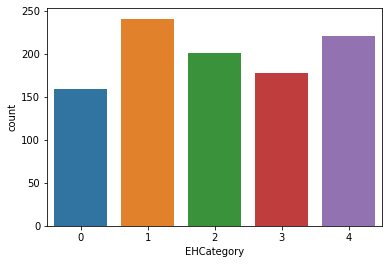

In [ ]:
#9.Experimental Hardware (EH)
sns.countplot(x = EH['EHCategory'].sort_values())

group_value = (EH.groupby('EHCategory').count()* 100)/1000

print (group_value)

            CSE-121  CSE-325  CSE-337  CSE-411  CSE-489  VGAverage
VGCategory                                                        
0               8.4      8.4      8.4      8.4      8.4        8.4
1              24.2     24.2     24.2     24.2     24.2       24.2
2              25.2     25.2     25.2     25.2     25.2       25.2
3              22.0     22.0     22.0     22.0     22.0       22.0
4              20.2     20.2     20.2     20.2     20.2       20.2


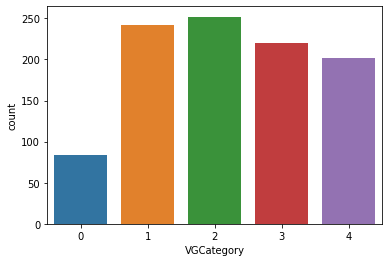

In [ ]:
#10.Vision and Graphics (VG)
sns.countplot(x = VG['VGCategory'].sort_values())

group_value = (VG.groupby('VGCategory').count()* 100)/1000

print (group_value)

            MAT-121  MAT-131  MAT-211  MAT-221  STA-221  NAAverage
NACategory                                                        
0              12.5     12.5     12.5     12.5     12.5       12.5
1              20.4     20.4     20.4     20.4     20.4       20.4
2              21.8     21.8     21.8     21.8     21.8       21.8
3              18.7     18.7     18.7     18.7     18.7       18.7
4              26.6     26.6     26.6     26.6     26.6       26.6


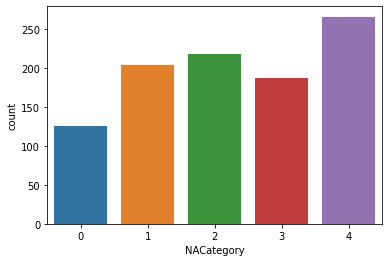

In [ ]:
#11.Numerical Analysis (NA)
sns.countplot(x = NA['NACategory'].sort_values())

group_value = (NA.groupby('NACategory').count()* 100)/1000

print (group_value)

             CSE-133  CSE-313  CSE-233  PHY-111  PHY-121  TEEAverage
TEECategory                                                         
0                8.9      8.9      8.9      8.9      8.9         8.9
1               21.3     21.3     21.3     21.3     21.3        21.3
2               24.4     24.4     24.4     24.4     24.4        24.4
3               17.8     17.8     17.8     17.8     17.8        17.8
4               27.6     27.6     27.6     27.6     27.6        27.6


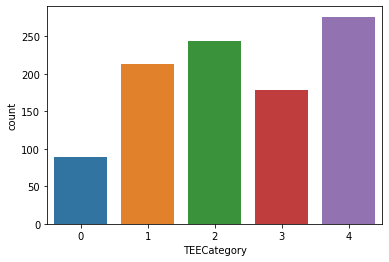

In [ ]:
#12.Theoretical Electrical and Electronics (TEE)
sns.countplot(x = TEE['TEECategory'].sort_values())

group_value = (TEE.groupby('TEECategory').count()* 100)/1000

print (group_value)

            CSE-221  CSE-311  CSE-321  CSE-417  CSE-499  ADAverage
ADCategory                                                        
0              10.9     10.9     10.9     10.9     10.9       10.9
1              19.2     19.2     19.2     19.2     19.2       19.2
2              23.4     23.4     23.4     23.4     23.4       23.4
3              20.1     20.1     20.1     20.1     20.1       20.1
4              26.4     26.4     26.4     26.4     26.4       26.4


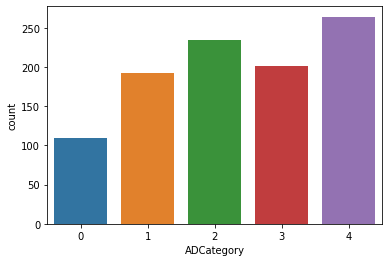

In [ ]:
#13.Application Development (AD)
sns.countplot(x = AD['ADCategory'].sort_values())

group_value = (AD.groupby('ADCategory').count()* 100)/1000

print (group_value)

             CSE-134  CSE-214  CSE-234  PHY-112  PHY-122  EEEAverage
EEECategory                                                         
0               16.7     16.7     16.7     16.7     16.7        16.7
1               28.4     28.4     28.4     28.4     28.4        28.4
2               26.9     26.9     26.9     26.9     26.9        26.9
3               15.7     15.7     15.7     15.7     15.7        15.7
4               12.3     12.3     12.3     12.3     12.3        12.3


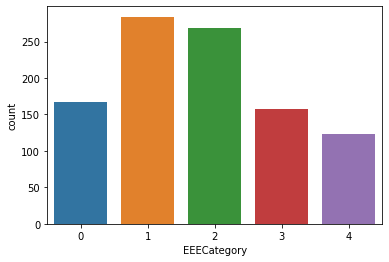

In [ ]:
#14.Experimental Electrical and Electronics (EEE)
sns.countplot(x = EEE['EEECategory'].sort_values())

group_value = (EEE.groupby('EEECategory').count()* 100)/1000

print (group_value)

             CSE-122  CSE-336  CSE-338  CSE-412  CSE-416  EVIAverage
EVICategory                                                         
0               12.7     12.7     12.7     12.7     12.7        12.7
1               20.4     20.4     20.4     20.4     20.4        20.4
2               23.0     23.0     23.0     23.0     23.0        23.0
3               19.0     19.0     19.0     19.0     19.0        19.0
4               24.9     24.9     24.9     24.9     24.9        24.9


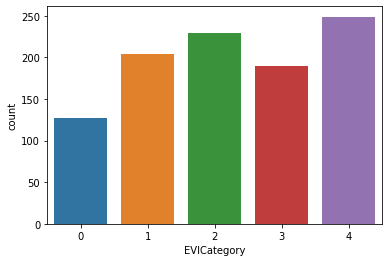

In [ ]:
#15.Experimental Vision and AI (EVI)
sns.countplot(x = EVI['EVICategory'].sort_values())

group_value = (EVI.groupby('EVICategory').count()* 100)/1000

print (group_value)

In [ ]:
#Dataset Formation
df = pd.concat(
    [IS.iloc[:, 0:5], 
     ND.iloc[:, 0:5], 
     TP.iloc[:, 0:5], 
     EP.iloc[:, 0:5], 
     LB.iloc[:, 0:5], 
     SD.iloc[:, 0:5], 
     ESD.iloc[:, 0:5], 
     SH.iloc[:, 0:5], 
     EH.iloc[:, 0:5], 
     VG.iloc[:, 0:5], 
     NA.iloc[:, 0:5], 
     TEE.iloc[:, 0:5], 
     AD.iloc[:, 0:5], 
     EEE.iloc[:, 0:5], 
     EVI.iloc[:, 0:5],
     IS.iloc[:, -1],
     ND.iloc[:, -1],
     TP.iloc[:, -1],
     EP.iloc[:, -1],
     LB.iloc[:, -1],
     SD.iloc[:, -1],
     ESD.iloc[:, -1],
     SH.iloc[:, -1],
     EH.iloc[:, -1],
     VG.iloc[:, -1],
     NA.iloc[:, -1],
     TEE.iloc[:, -1],
     AD.iloc[:, -1],
     EEE.iloc[:, -1],
     EVI.iloc[:, -1]
    ], 
    axis=1, join='inner')

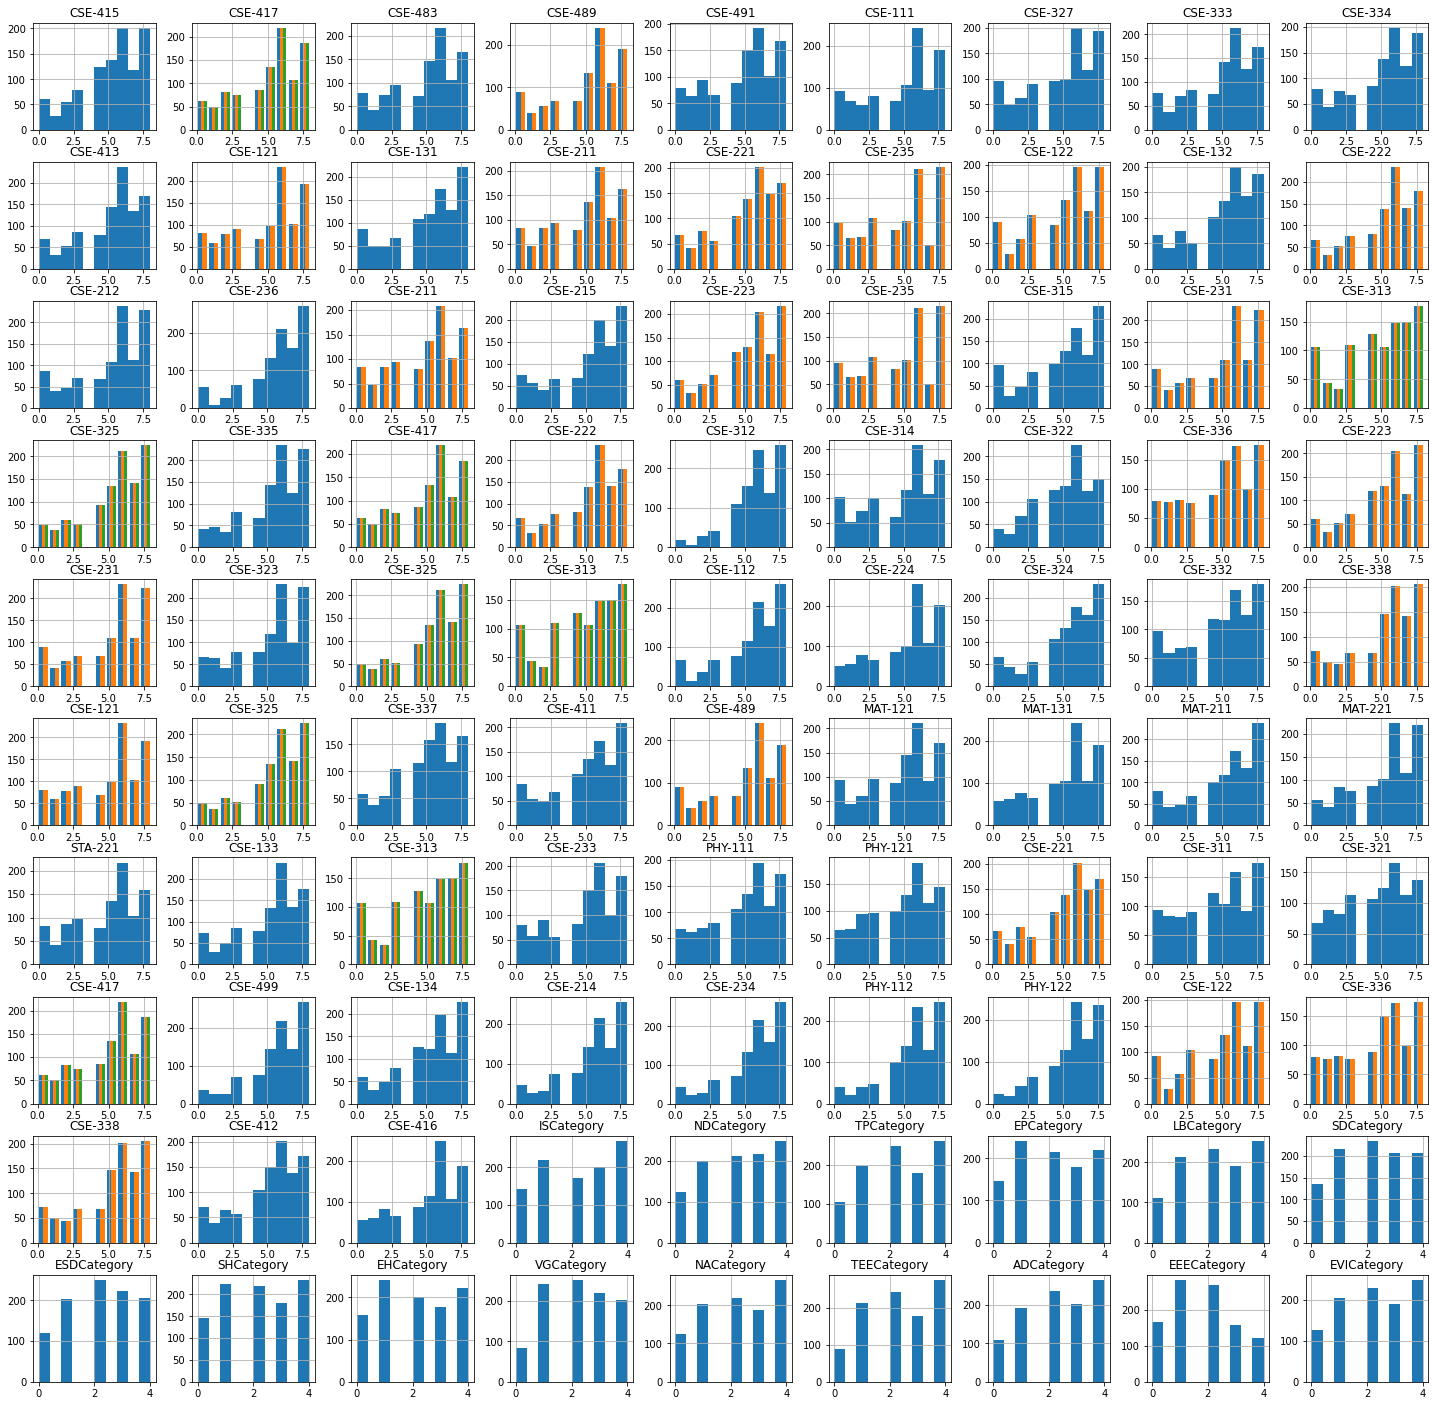

In [ ]:
#Plotting the Dataset
df.hist(figsize = (25, 25))
plt.show()

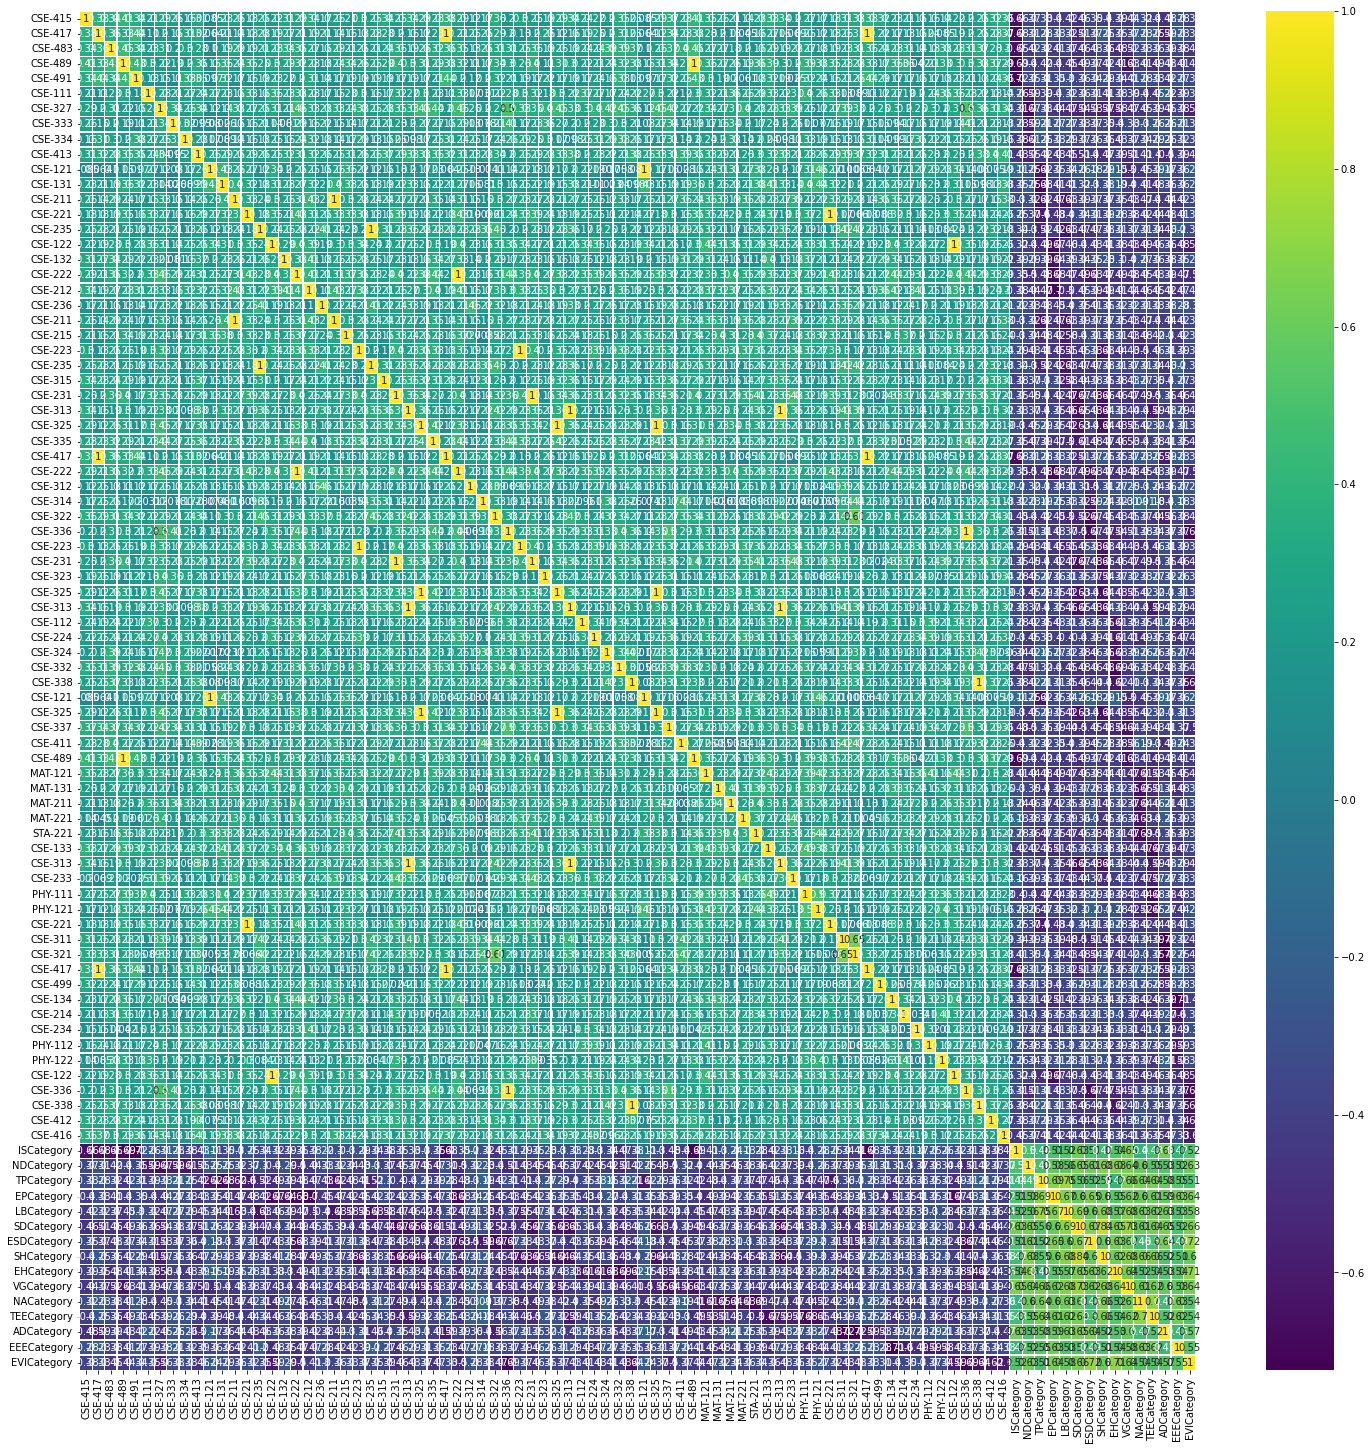

In [ ]:
#Correlation Matrix Visualization
corrmat = df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

In [ ]:
#Scattering the Plot
#scatter_matrix(df, figsize = (20, 20))
#plt.show()

## **Features and Lables Dividing**

In [ ]:
#Features
x = df.iloc[:, 0:75]

In [ ]:
#Labels
y = df.iloc[:, -15:]

# **Dividing Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)

# **Model Developing using DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# train
classifier.fit(xtrain, ytrain)

# predict
predictions = classifier.predict(xtest)

#cs = accuracy_score(ytest, predictions)

#print ("Accuracy Score is: ", cs * 100, "%")
cr_y1 = classification_report(ytest.iloc[:, 0].values, predictions[:, 0])
print("Classification Report is: ")
print(cr_y1)

print("Confusion Matrix is: ")
cm = multilabel_confusion_matrix(ytest.iloc[:, 0], predictions[:, 0])
#print (cm)
cm = cm.mean(axis = 0) #Avereging of each CM for 5 different grades
print (cm)

print("Confusion Matrix is: ")
cml = []
for i in range(15):
  cr_y1 = classification_report(ytest.iloc[:, i], predictions[:, i])
  #print("Classification Report is: ")
  #print(cr_y1)

  #print("Confusion Matrix is: ")
  cm = multilabel_confusion_matrix(ytest.iloc[:, i], predictions[:, i])
  cM = cm.mean(axis = 0)
  cml.insert(i, cM)

npr = np.array(cml)
CM = npr.mean(axis = 0)

print (CM)

#type(CM)
#CM.shape
#print (CM[0][0])
#print (CM[0][1])

TP = CM[0][0] #True Positive
FP = CM[0][1] #False Positive
FN = CM[1][0] #False Negative
TN = CM[1][1] #True Negative

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(FP + TP)
Recall = (TP)/(FN + TP)
F1Measure = (2 * Precision * Recall)/(Precision + Recall)

print ("Accuracy is: ", Accuracy * 100, "%")
print ("Precision is: ", Precision * 100, "%")
print ("Recall is: ", Recall * 100, "%")
print ("F1Measure is: ", F1Measure * 100, "%")

print ("Accuracy is: ", Accuracy)
print ("Precision is: ", Precision)
print ("Recall is: ", Recall)
print ("F1Measure is: ", F1Measure)


Classification Report is: 
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.71      0.72      0.71        64
           2       0.83      0.74      0.78        53
           3       0.70      0.70      0.70        64
           4       0.86      0.88      0.87        78

    accuracy                           0.77       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.77      0.77       300

Confusion Matrix is: 
[[226.2  13.8]
 [ 13.8  46.2]]
Confusion Matrix is: 
[[227.38666667  12.61333333]
 [ 12.61333333  47.38666667]]
Accuracy is:  91.5911111111111 %
Precision is:  94.74444444444444 %
Recall is:  94.74444444444444 %
F1Measure is:  94.74444444444444 %
Accuracy is:  0.915911111111111
Precision is:  0.9474444444444444
Recall is:  0.9474444444444444
F1Measure is:  0.9474444444444444


Text(33.0, 0.5, 'Actual Label')

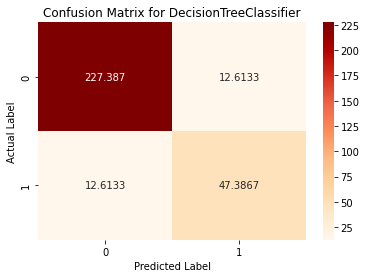

In [ ]:
#Visualization of the Confusion Matrix of DecisionTreeClassifier
p = sns.heatmap(pd.DataFrame(CM), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

## **Model Developing using ExtraTreeClassifier**

In [ ]:
from sklearn.tree import ExtraTreeClassifier
classifier = ExtraTreeClassifier()

# train
classifier.fit(xtrain, ytrain)

# predict
predictions = classifier.predict(xtest)

#cs = accuracy_score(ytest, predictions)

#print ("Accuracy Score is: ", cs * 100, "%")
cr_y1 = classification_report(ytest.iloc[:, 0], predictions[:, 0])
print("Classification Report is: ")
print(cr_y1)

print("Confusion Matrix is: ")
cm = multilabel_confusion_matrix(ytest.iloc[:, 0], predictions[:, 0])
#print (cm)
cm = cm.mean(axis = 0)
print (cm)

print("Confusion Matrix is: ")
cm2 = []
for i in range(15):
  cr_y1 = classification_report(ytest.iloc[:, i], predictions[:, i])
  #print("Classification Report is: ")
  #print(cr_y1)

  #print("Confusion Matrix is: ")
  cm = multilabel_confusion_matrix(ytest.iloc[:, i], predictions[:, i])
  cM = cm.mean(axis = 0)
  cm2.insert(i, cM)

npr = np.array(cm2)
CM = npr.mean(axis = 0)

print (CM)

#type(CM)
#CM.shape
#print (CM[0][0])
#print (CM[0][1])

TP = CM[0][0] #True Positive
FP = CM[0][1] #False Positive
FN = CM[1][0] #False Negative
TN = CM[1][1] #True Negative

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(FP + TP)
Recall = (TP)/(FN + TP)
F1Measure = (2 * Precision * Recall)/(Precision + Recall)

print ("Accuracy is: ", Accuracy * 100, "%")
print ("Precision is: ", Precision * 100, "%")
print ("Recall is: ", Recall * 100, "%")
print ("F1Measure is: ", F1Measure * 100, "%")

Classification Report is: 
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.72      0.69      0.70        64
           2       0.59      0.70      0.64        53
           3       0.74      0.66      0.69        64
           4       0.87      0.87      0.87        78

    accuracy                           0.73       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.73      0.73      0.73       300

Confusion Matrix is: 
[[223.6  16.4]
 [ 16.4  43.6]]
Confusion Matrix is: 
[[226.45333333  13.54666667]
 [ 13.54666667  46.45333333]]
Accuracy is:  90.96888888888887 %
Precision is:  94.35555555555555 %
Recall is:  94.35555555555555 %
F1Measure is:  94.35555555555555 %


Text(33.0, 0.5, 'Actual Label')

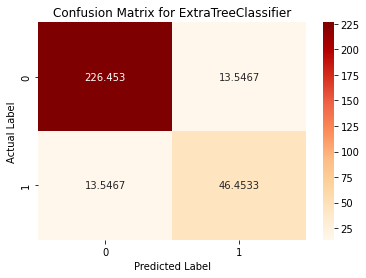

In [ ]:
#Visualization of the Confusion Matrix of  ExtraTreeClassifier
p = sns.heatmap(pd.DataFrame(CM), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for ExtraTreeClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


## **Model Developing using KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# train
classifier.fit(xtrain, ytrain)

# predict
predictions = classifier.predict(xtest)

#cs = accuracy_score(ytest, predictions)

#print ("Accuracy Score is: ", cs * 100, "%")
cr_y1 = classification_report(ytest.iloc[:, 0], predictions[:, 0])
print("Classification Report is: ")
print(cr_y1)

print("Confusion Matrix is: ")
cm = multilabel_confusion_matrix(ytest.iloc[:, 0], predictions[:, 0])
#print (cm)
cm = cm.mean(axis = 0)
print (cm)


print("Confusion Matrix is: ")
cm3 = []
for i in range(15):
  cr_y1 = classification_report(ytest.iloc[:, i], predictions[:, i])
  #print("Classification Report is: ")
  #print(cr_y1)

  #print("Confusion Matrix is: ")
  cm = multilabel_confusion_matrix(ytest.iloc[:, i], predictions[:, i])
  cM = cm.mean(axis = 0)
  cm3.insert(i, cM)

npr = np.array(cm3)
CM = npr.mean(axis = 0)

print (CM)

TP = CM[0][0] #True Positive
FP = CM[0][1] #False Positive
FN = CM[1][0] #False Negative
TN = CM[1][1] #True Negative

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(FP + TP)
Recall = (TP)/(FN + TP)
F1Measure = (2 * Precision * Recall)/(Precision + Recall)

print ("Accuracy is: ", Accuracy * 100, "%")
print ("Precision is: ", Precision * 100, "%")
print ("Recall is: ", Recall * 100, "%")
print ("F1Measure is: ", F1Measure * 100, "%")

Classification Report is: 
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        41
           1       0.45      0.78      0.57        64
           2       0.40      0.36      0.38        53
           3       0.62      0.41      0.49        64
           4       0.88      0.76      0.81        78

    accuracy                           0.58       300
   macro avg       0.60      0.56      0.56       300
weighted avg       0.62      0.58      0.58       300

Confusion Matrix is: 
[[215.  25.]
 [ 25.  35.]]
Confusion Matrix is: 
[[214.78666667  25.21333333]
 [ 25.21333333  34.78666667]]
Accuracy is:  83.19111111111113 %
Precision is:  89.49444444444444 %
Recall is:  89.49444444444444 %
F1Measure is:  89.49444444444443 %


Text(33.0, 0.5, 'Actual Label')

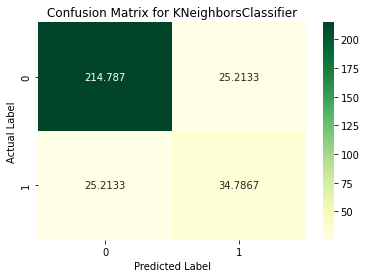

In [ ]:
#Visualization of the Confusion Matrix KNeighborsClassifier
p = sns.heatmap(pd.DataFrame(CM), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# **Model Developing using RadiusNeighborsClassifier**

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
classifier = RadiusNeighborsClassifier(radius = 300.0)#What is radius

# train
classifier.fit(xtrain, ytrain)

# predict
predictions = classifier.predict(xtest)

#cs = accuracy_score(ytest, predictions)

#print ("Accuracy Score is: ", cs * 100, "%")
cr_y1 = classification_report(ytest.iloc[:, 0], predictions[:, 0])
print("Classification Report is: ")
print(cr_y1)

print("Confusion Matrix is: ")
cm = multilabel_confusion_matrix(ytest.iloc[:, 0], predictions[:, 0])
#print (cm)
cm = cm.mean(axis = 0)
print (cm)

print("Confusion Matrix is: ")
cm4 = []
for i in range(15):
  cr_y1 = classification_report(ytest.iloc[:, i], predictions[:, i])
  #print("Classification Report is: ")
  #print(cr_y1)

  #print("Confusion Matrix is: ")
  cm = multilabel_confusion_matrix(ytest.iloc[:, i], predictions[:, i])
  cM = cm.mean(axis = 0)
  cm4.insert(i, cM)

npr = np.array(cm4)
CM = npr.mean(axis = 0)

print (CM)

#type(CM)
#CM.shape
#print (CM[0][0])
#print (CM[0][1])

TP = CM[0][0] #True Positive
FP = CM[0][1] #False Positive
FN = CM[1][0] #False Negative
TN = CM[1][1] #True Negative

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(FP + TP)
Recall = (TP)/(FN + TP)
F1Measure = (2 * Precision * Recall)/(Precision + Recall)

print ("Accuracy is: ", Accuracy * 100, "%")
print ("Precision is: ", Precision * 100, "%")
print ("Recall is: ", Recall * 100, "%")
print ("F1Measure is: ", F1Measure * 100, "%")

Classification Report is: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        64
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        64
           4       0.26      1.00      0.41        78

    accuracy                           0.26       300
   macro avg       0.05      0.20      0.08       300
weighted avg       0.07      0.26      0.11       300

Confusion Matrix is: 
[[195.6  44.4]
 [ 44.4  15.6]]
Confusion Matrix is: 
[[195.18666667  44.81333333]
 [ 44.81333333  15.18666667]]
Accuracy is:  70.12444444444445 %
Precision is:  81.32777777777778 %
Recall is:  81.32777777777778 %
F1Measure is:  81.32777777777777 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Text(33.0, 0.5, 'Actual Label')

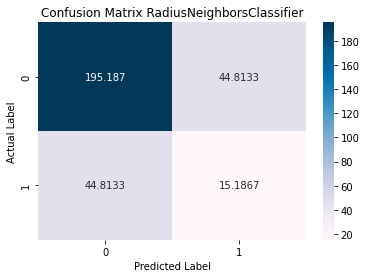

In [ ]:
#Visualization of the Confusion Matrix RadiusNeighborsClassifier
p = sns.heatmap(pd.DataFrame(CM), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix RadiusNeighborsClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# **Model Developing using RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

# train
classifier.fit(xtrain, ytrain)

# predict
predictions = classifier.predict(xtest)

#cs = accuracy_score(ytest, predictions)

#print ("Accuracy Score is: ", cs * 100, "%")
cr_y1 = classification_report(ytest.iloc[:, 0], predictions[:, 0])
print("Classification Report is: ")
print(cr_y1)

print("Confusion Matrix is: ")
cm = multilabel_confusion_matrix(ytest.iloc[:, 0], predictions[:, 0])
#print (cm)
cm = cm.mean(axis = 0)
print (cm)

print("Confusion Matrix is: ")
cm5 = []
for i in range(15):
  cr_y1 = classification_report(ytest.iloc[:, i], predictions[:, i])
  #print("Classification Report is: ")
  #print(cr_y1)

  #print("Confusion Matrix is: ")
  cm = multilabel_confusion_matrix(ytest.iloc[:, i], predictions[:, i])
  cM = cm.mean(axis = 0)
  cm5.insert(i, cM)

npr = np.array(cm5)
CM = npr.mean(axis = 0)

print (CM)

#type(CM)
#CM.shape
#print (CM[0][0])
#print (CM[0][1])

TP = CM[0][0] #True Positive
FP = CM[0][1] #False Positive
FN = CM[1][0] #False Negative
TN = CM[1][1] #True Negative

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(FP + TP)
Recall = (TP)/(FN + TP)
F1Measure = (2 * Precision * Recall)/(Precision + Recall)

print ("Accuracy is: ", Accuracy * 100, "%")
print ("Precision is: ", Precision * 100, "%")
print ("Recall is: ", Recall * 100, "%")
print ("F1Measure is: ", F1Measure * 100, "%")

Classification Report is: 
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.67      0.83      0.74        64
           2       0.88      0.70      0.78        53
           3       0.92      0.73      0.82        64
           4       0.87      0.99      0.92        78

    accuracy                           0.82       300
   macro avg       0.83      0.80      0.81       300
weighted avg       0.83      0.82      0.82       300

Confusion Matrix is: 
[[229.  11.]
 [ 11.  49.]]
Confusion Matrix is: 
[[230.92   9.08]
 [  9.08  50.92]]
Accuracy is:  93.94666666666667 %
Precision is:  96.21666666666667 %
Recall is:  96.21666666666667 %
F1Measure is:  96.21666666666667 %


Text(33.0, 0.5, 'Actual Label')

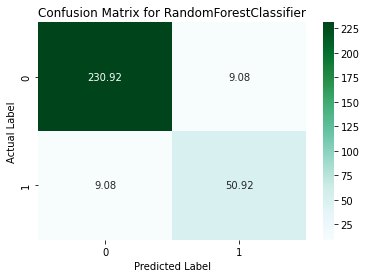

In [ ]:
#Visualization of the Confusion Matrix of RandomForestClassifier
p = sns.heatmap(pd.DataFrame(CM), annot = True, cmap = 'BuGn', fmt = 'g')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# **Model Developing using ExtraTreesClassifier (Ensemble)**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()

# train
classifier.fit(xtrain, ytrain)

# predict
predictions = classifier.predict(xtest)

#cs = accuracy_score(ytest, predictions)

#print ("Accuracy Score is: ", cs * 100, "%")
cr_y1 = classification_report(ytest.iloc[:, 0], predictions[:, 0])
print("Classification Report is: ")
print(cr_y1)

print("Confusion Matrix is: ")
cm = multilabel_confusion_matrix(ytest.iloc[:, 0], predictions[:, 0])
#print (cm)
cm = cm.mean(axis = 0)
print (cm)

print("Confusion Matrix is: ")
cm5 = []
for i in range(15):
  cr_y1 = classification_report(ytest.iloc[:, i], predictions[:, i])
  #print("Classification Report is: ")
  #print(cr_y1)

  #print("Confusion Matrix is: ")
  cm = multilabel_confusion_matrix(ytest.iloc[:, i], predictions[:, i])
  cM = cm.mean(axis = 0)
  cm5.insert(i, cM)

npr = np.array(cm5)
CM = npr.mean(axis = 0)

print (CM)

#type(CM)
#CM.shape
#print (CM[0][0])
#print (CM[0][1])

TP = CM[0][0] #True Positive
FP = CM[0][1] #False Positive
FN = CM[1][0] #False Negative
TN = CM[1][1] #True Negative

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(FP + TP)
Recall = (TP)/(FN + TP)
F1Measure = (2 * Precision * Recall)/(Precision + Recall)

print ("Accuracy is: ", Accuracy * 100, "%")
print ("Precision is: ", Precision * 100, "%")
print ("Recall is: ", Recall * 100, "%")
print ("F1Measure is: ", F1Measure * 100, "%")

Classification Report is: 
              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.69      0.88      0.77        64
           2       0.85      0.74      0.79        53
           3       0.91      0.77      0.83        64
           4       0.90      0.99      0.94        78

    accuracy                           0.83       300
   macro avg       0.84      0.81      0.82       300
weighted avg       0.84      0.83      0.83       300

Confusion Matrix is: 
[[229.8  10.2]
 [ 10.2  49.8]]
Confusion Matrix is: 
[[231.10666667   8.89333333]
 [  8.89333333  51.10666667]]
Accuracy is:  94.07111111111112 %
Precision is:  96.29444444444444 %
Recall is:  96.29444444444444 %
F1Measure is:  96.29444444444444 %


Text(33.0, 0.5, 'Actual Label')

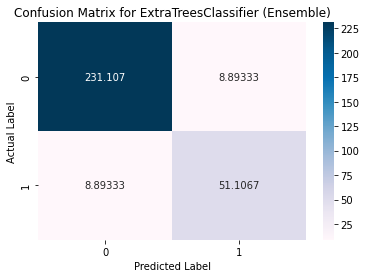

In [ ]:
#Visualization of the Confusion Matrix of ExtraTreesClassifier (Ensemble)
p = sns.heatmap(pd.DataFrame(CM), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix for ExtraTreesClassifier (Ensemble)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')